# Simple Linear Regression
Dr. Itauma
## Objectives
After this lab you will be able to:
* Use scikit-learn to implement simple linear regression
* Create model, train it, test it and use the model

# Importing Needed packages

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import wget
%matplotlib inline


# Downloading Data

In [8]:
url = 'https://raw.githubusercontent.com/DrItauma-NU/MGT-665/main/DataFiles/Airfares.csv'
Airfares = wget.download(url)


# Reading the data

In [10]:
df = pd.read_csv("Airfares.csv")

# take a look at the dataset
df.head()


,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


# Data Exploration
Let's explore the data

In [11]:
# Summarize the data
df.describe()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,638.000000,638.000000,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000
mean,1.202335,2.753918,4442.141129,27759.860502,27663.727273,4.557004e+06,3.194503e+06,975.653605,12782.214734,160.876677
std,0.203821,0.760448,1724.267051,3596.207837,4611.325018,3.010985e+06,2.735604e+06,646.242403,13202.228860,76.022436
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,42.470000
25%,1.040000,3.000000,3090.137500,24706.000000,23903.000000,1.862106e+06,1.228816e+06,455.000000,5328.500000,106.290000
50%,1.150000,3.000000,4208.185000,28637.000000,26409.000000,3.532657e+06,2.195215e+06,850.000000,7792.000000,144.600000
75%,1.297500,3.000000,5480.575000,29693.500000,31981.000000,7.830332e+06,4.549784e+06,1306.250000,14090.500000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,2764.000000,73892.000000,402.020000


Let's select some features to explore

In [16]:
cdf = df[['S_INCOME', 'E_INCOME', 'FARE']]
cdf.head(9)


,S_INCOME,E_INCOME,FARE
0,28637.0,21112.0,64.11
1,26993.0,29838.0,174.47
2,30124.0,29838.0,207.76
3,29260.0,29838.0,85.47
4,29260.0,29838.0,85.47
5,26046.0,29838.0,56.76
6,28637.0,29838.0,228.00
7,26752.0,29838.0,116.54
8,27211.0,29838.0,172.63


We can plot each of the features

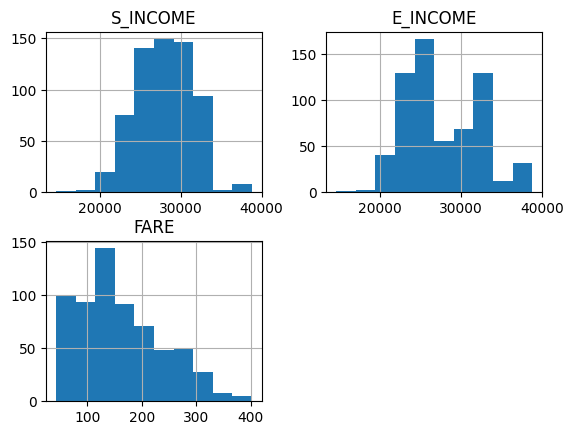

In [17]:
cdf.hist()
plt.show()

Explore the relationships

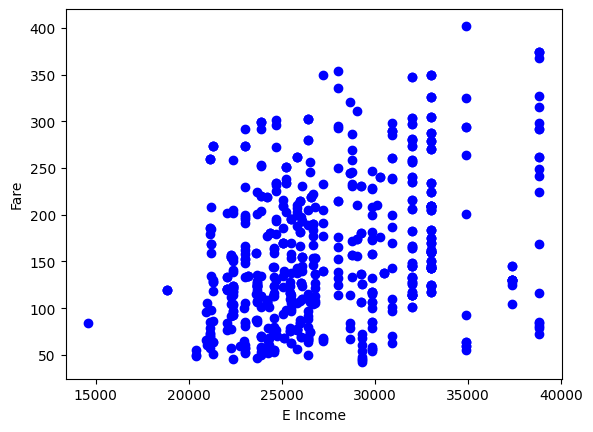

In [20]:
plt.scatter(cdf.E_INCOME, cdf.FARE, color='blue')
plt.xlabel("E Income")
plt.ylabel("Fare")
plt.show()

# Creating train and test dataset
80% for training and 20% for testing.

In [22]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Simple Liear Regression Model

In [27]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['E_INCOME']])
train_y = np.asanyarray(train[['FARE']])
regr.fit(train_x, train_y)

# The coefficients
print("Coefficients", regr.coef_)
print("Intercepts", regr.intercept_)
print(regr)


Coefficients [[0.00562546]]
Intercepts [6.30079761]
LinearRegression()
